 # ONLINE BUSINESS SALES 2017-2019
 
 The datasets are from a unnamed business' online retail sales from Kaggle.com.

## Problem Statement


The datasets are from a unnamed business online retail sales. Unfortunately, they have had to cut back from 25 employees to 5 because of the economic downturn with the corona virus. Help them by identify the most ordered product type, product type that have the most average total net sales and which product that have the lowest return so they can plan their business to run in a long term.


## Importing packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10


## Reading datasets file

In [7]:
sales = pd.read_csv('../data/business.retailsales.csv')

In [8]:
sales.head(3) #showing DataFrame

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.0,-1609.0,12732.0
1,Basket,13,3744.0,-316.8,0.0,3427.2
2,Basket,12,3825.0,-201.6,-288.0,3335.4


In [9]:
sales.shape #showing the rows and columns 

(1775, 6)

In [10]:
sales.columns #showing columns name

Index(['Product Type', 'Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')

In [11]:
#renaming the columns

sales.rename(columns={'Product Type':'product_type','Net Quantity':'net_quantity','Gross Sales':'gross_sales','Discounts':"discounts",'Returns':'returns','Total Net Sales':'total_net_sales'},inplace = True)

In [12]:
sales.columns #testing the renaming function

Index(['product_type', 'net_quantity', 'gross_sales', 'discounts', 'returns',
       'total_net_sales'],
      dtype='object')

In [13]:
sales.index # showing the columns index info

RangeIndex(start=0, stop=1775, step=1)

In [14]:
print(sales.index.name) #the index name is none since we do not set any column as index

None


In [15]:
pd.DataFrame(sales.dtypes, columns=['DataType']) # showing data types

,DataType
product_type,object
net_quantity,int64
gross_sales,float64
discounts,float64
returns,float64
total_net_sales,float64


In [16]:
#converting data type

sales = sales.astype({'product_type':object,
                      'net_quantity':int,
                      'gross_sales':int,
                      'discounts':int,
                      'returns':int,
                      'total_net_sales':int})

In [17]:
pd.DataFrame(sales.dtypes, columns=['DataType'])

,DataType
product_type,object
net_quantity,int32
gross_sales,int32
discounts,int32
returns,int32
total_net_sales,int32


## Handling data missing data

### Identifying missing data

In [18]:
#returning non-missing data as True
#As we can see the first 5 rows have no missing data

sales.notnull().head()

,product_type,net_quantity,gross_sales,discounts,returns,total_net_sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [19]:
sales.isnull().head()

#returning non-missing data as False
#First 5 rows have no missing datas

,product_type,net_quantity,gross_sales,discounts,returns,total_net_sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [20]:
#However we can see the aggregate missing data for each column by this

sales.isnull().sum()

product_type       8
net_quantity       0
gross_sales        0
discounts          0
returns            0
total_net_sales    0
dtype: int64

In [21]:
#Making new column for missing data


null_sales = pd.DataFrame(sales.isnull().sum(), columns=['Count of Nulls'])
null_sales.index.name = 'Column'
null_sales.sort_values(['Count of Nulls'], ascending=False).head(10)

,Count of Nulls
Column,
product_type,8
net_quantity,0
gross_sales,0
discounts,0
returns,0
total_net_sales,0


### Cleaning missing data

There are two ways to handle missing data as to drop them or fill them. I choose to drop them.

In [22]:
sales['product_type'].dropna(inplace=False) #drop the null data

0       Art & Sculpture
1                Basket
2                Basket
3                Basket
4       Art & Sculpture
             ...       
1770            Kitchen
1771            Jewelry
1772             Basket
1773            Kitchen
1774            Kitchen
Name: product_type, Length: 1767, dtype: object

In [23]:
sales.dropna(subset=['product_type']).head(3) #other way to drop null data

,product_type,net_quantity,gross_sales,discounts,returns,total_net_sales
0,Art & Sculpture,34,14935,-594,-1609,12732
1,Basket,13,3744,-316,0,3427
2,Basket,12,3825,-201,-288,3335


## Grouping by Product Type

It will be easier to access data for each product type

In [41]:
sales.groupby(by=['product_type']).head()

,product_type,net_quantity,gross_sales,discounts,returns,total_net_sales
0,Art & Sculpture,34,14935,-594,-1609,12732
1,Basket,13,3744,-316,0,3427
2,Basket,12,3825,-201,-288,3335
3,Basket,17,3035,-63,0,2971
4,Art & Sculpture,47,2696,-44,0,2652
...,...,...,...,...,...,...
1028,NaN,1,75,0,0,75
1030,NaN,1,75,0,0,75
1287,NaN,1,48,0,0,48
1482,Easter,1,38,-3,0,34


### Finding the average total net sales for each product type

In [42]:
#return the average total net sales of all columns

sales['total_net_sales'].mean()

187.78028169014084

In [25]:
#return the average total net sales for each product type

sales.groupby(['product_type'])['total_net_sales'].mean().head(3)

product_type
Accessories         96.948718
Art & Sculpture    250.492582
Basket             244.462795
Name: total_net_sales, dtype: float64

<AxesSubplot:xlabel='product_type'>

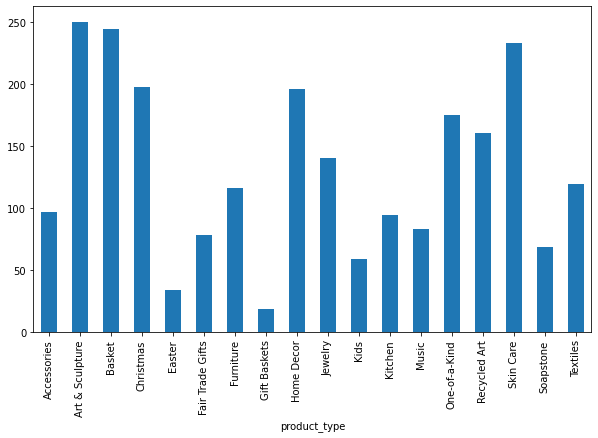

In [26]:
#Visualizing the data for better understanding

sales.groupby(['product_type'])['total_net_sales'].mean().plot(kind='bar')

### Finding the most ordered product type

In [27]:
sales.groupby(['product_type'])['net_quantity'].sum().sort_values( ascending=False).head(3)

product_type
Basket             1461
Art & Sculpture    1427
Jewelry             991
Name: net_quantity, dtype: int32

<AxesSubplot:ylabel='net_quantity'>

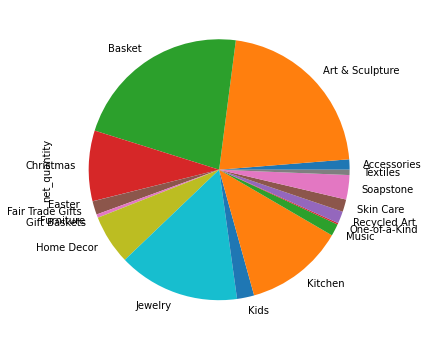

In [28]:
sales.groupby(['product_type'])['net_quantity'].sum().plot(kind='pie')

### Finding the most discounted product type

In [29]:
# negative value means the how much the discount given for the particular product type

sales.groupby(['product_type'])['discounts'].sum().sort_values( ascending=True).head(3)

product_type
Basket            -4474
Art & Sculpture   -2883
Home Decor         -953
Name: discounts, dtype: int32

### Finding product type that have lowest return

In [30]:
#returns here means profit/loss

sales.groupby(['product_type'])['returns'].sum().sort_values( ascending=True).head(3)

product_type
Basket            -4437
Art & Sculpture   -2878
Christmas          -670
Name: returns, dtype: int32

## Conclusion


We can see from the above analyzed datas that Basket and Art & Sculpture are one of the popular product and have the highest discount despite of being the top 2 product type that have the lowest return. Considering that both of them having the highest net quantity, we can suggest that the client to lower the discounted rate for the both product type and discontinued the product type that have the lowest net quantity such as Easter and Gift Basket. Since both of them a seasonal item type, they can release it as a seasonal item. These suggestions would help them to increase their return and also lowering their product cost so that they still can run the business in the long term.

## Changing Product Type to Acronym

In [31]:
def product_type_to_acronym(product_type): 
    product_type_dict = {'Art & Sculpture':'AS',
                         'Basket':'B', 
                         'Christmas':'C',
                         'Home Decor':'HM',
                         'Recycled Art':'RA', 
                         'Jewelry':'J',
                         'Skin Care':'SC',
                         'Kitchen':'KC',
                         'Textiles':'T',
                         'Accessories':'A',
                         'Fair Trade Gifts':'FTG',
                         'One-of-a-Kind':'OOAK', 
                         'Soapstone':'SS',
                         'Music':'M', 
                         'Furniture':'F', 
                         'Kids':'K', 
                         'Easter':'E', 
                         'Gift Baskets':'GB' 
                        }
    
    try:
        return product_type_dict[product_type]
    except:
        return 'N'

In [32]:
product_type_to_acronym('Tree')

'N'